In [1]:
import json
import pandas as pd
import seaborn as sns

from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
#PART 1
#Loading the data
with open(r"C:\Users\tammy\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\logins.json", 'r') as json_data:
    data =json.load(json_data)

In [3]:
data

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [4]:
#Normalizing the json data
normalized_data =pd.json_normalize(data)

In [5]:
#Converting to pandas Dataframe
df1 = pd.DataFrame(normalized_data['login_time'][0], columns=['login_time'])

In [6]:
#Exploding the data to extract list 
df1_explode = df1.explode('login_time')

In [7]:
df1_explode

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [8]:
#Converting the format to datetime format
df1_explode['login_time'] = pd.to_datetime(df1_explode['login_time'])

In [9]:
df1_explode.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [10]:
df1_explode.set_index('login_time', inplace=True)

In [11]:
login_counts_15min = df1_explode.resample('15T').size()

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(login_counts_15min)

login_time
1970-01-01 20:00:00     2
1970-01-01 20:15:00     6
1970-01-01 20:30:00     9
1970-01-01 20:45:00     7
1970-01-01 21:00:00     1
1970-01-01 21:15:00     4
1970-01-01 21:30:00     0
1970-01-01 21:45:00     4
1970-01-01 22:00:00     9
1970-01-01 22:15:00     8
1970-01-01 22:30:00     1
1970-01-01 22:45:00     3
1970-01-01 23:00:00    16
1970-01-01 23:15:00    13
1970-01-01 23:30:00    14
1970-01-01 23:45:00    15
1970-01-02 00:00:00    10
1970-01-02 00:15:00    18
1970-01-02 00:30:00    12
1970-01-02 00:45:00    13
1970-01-02 01:00:00     9
1970-01-02 01:15:00     8
1970-01-02 01:30:00    10
1970-01-02 01:45:00     6
1970-01-02 02:00:00     7
1970-01-02 02:15:00    18
1970-01-02 02:30:00    12
1970-01-02 02:45:00     6
1970-01-02 03:00:00    12
1970-01-02 03:15:00     5
1970-01-02 03:30:00     6
1970-01-02 03:45:00     5
1970-01-02 04:00:00     2
1970-01-02 04:15:00     0
1970-01-02 04:30:00     5
1970-01-02 04:45:00     2
1970-01-02 05:00:00     5
1970-01-02 05:15:00     4
1

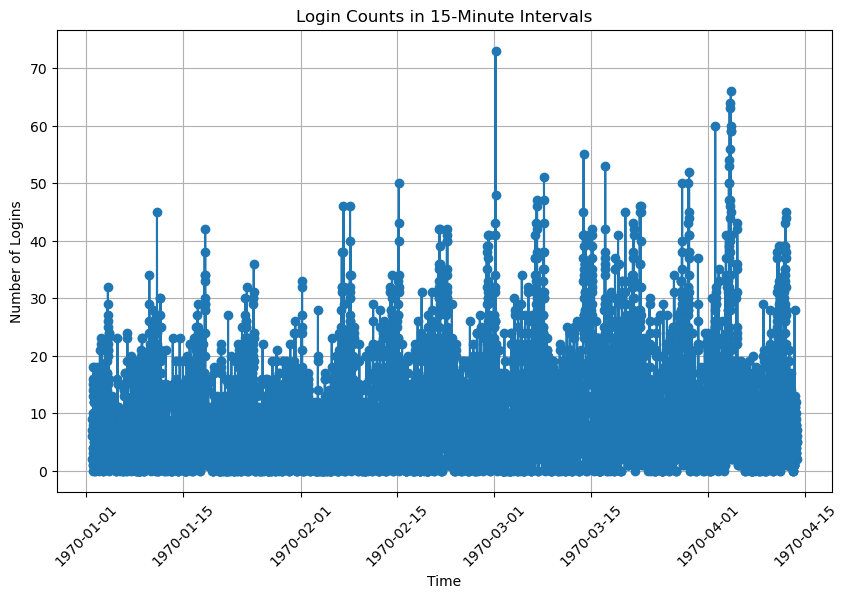

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(login_counts_15min, marker='o')
plt.title('Login Counts in 15-Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [14]:
#There is initial low login counts in the early hours of the Evening (20:00 - 22:00)
#Surge in activity from 22:00 - 2:00), Gradual decline from 2:00 - 4:00. Logins drops significantly from 4:00 upwards.  Data Quality issues: The limited time span( the data is from one year 1970 and only covers a few months). 

In [15]:
with open(r"C:\Users\tammy\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json", 'r') as json_data1:
    data1 =json.load(json_data1)

In [16]:
data1

[{'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 3,
  'signup_date': '2014-01-06',
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 100.0,
  'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0},
 {'city': "King's Landing",
  'trips_in_fir

In [17]:
normalized_data1 = pd.json_normalize(data1)

In [18]:
df2 = pd.DataFrame(normalized_data1)

In [19]:
df2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [20]:
df2.reset_index(drop =True, inplace = True)

In [21]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [23]:
#checking for null values
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [24]:
#Filling in the missing values of avg_rating _of driver and avg_rating_by_driver with their average mean
df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean(), inplace=True)
df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].mean(), inplace=True)

In [25]:
#Filling in the missing values of phone with their mode
df2['phone'].fillna(df2['phone'].mode()[0], inplace =True)

In [26]:
#verifying for missing values
df2.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

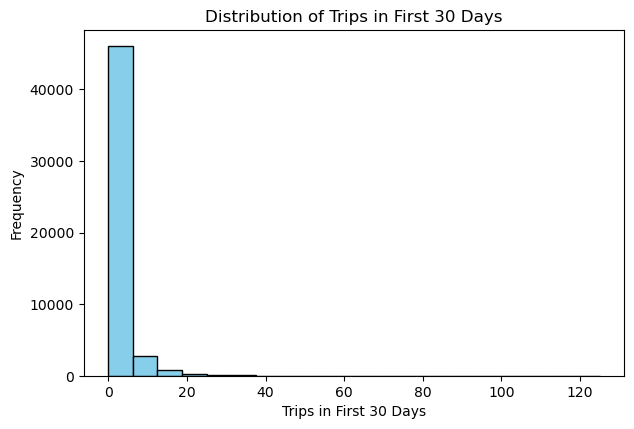

In [27]:
# Plotting the distribution of trips in the first 30 days
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df2['trips_in_first_30_days'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Trips in First 30 Days')
plt.xlabel('Trips in First 30 Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

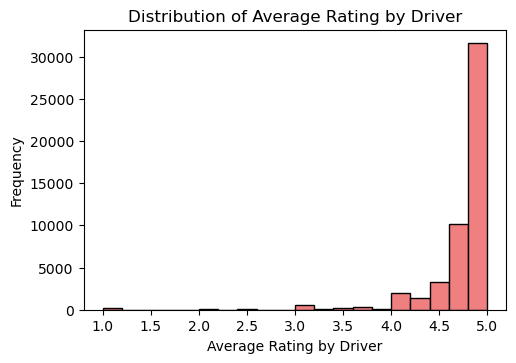

In [28]:
# Plotting the distribution of average rating by driver
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 3)
plt.hist(df2['avg_rating_by_driver'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Average Rating by Driver')
plt.xlabel('Average Rating by Driver')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

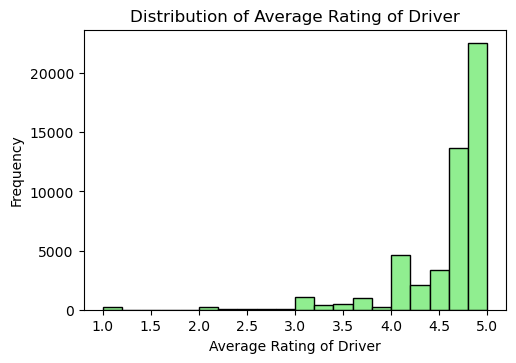

In [29]:
# Plotting the distribution of average rating of driver
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 2)
plt.hist(df2['avg_rating_of_driver'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Average Rating of Driver')
plt.xlabel('Average Rating of Driver')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

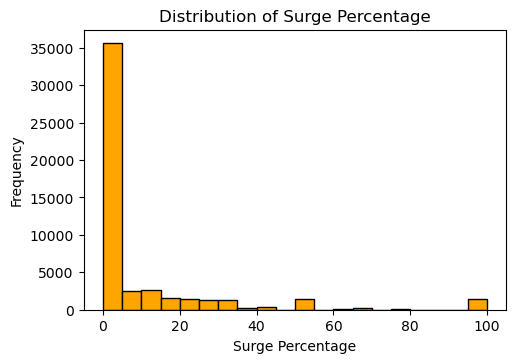

In [30]:
# Plotting the distribution of surge percentage
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)
plt.hist(df2['surge_pct'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Surge Percentage')
plt.xlabel('Surge Percentage')
plt.ylabel('Frequency')

In [31]:
#Converting signup_date and last_trip_date to datetime format
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

In [32]:
#Calculating days between last trip and sign up
df2['active'] = (df2['last_trip_date'] - df2['signup_date']).dt.days



#Defining retention to see users active in the 6month
df2['retained'] = df2['active'].apply(lambda x: 1 if x>=180 else 0)

Fraction_retained = df2['retained'].mean()
print(f'Fraction of retained users: {Fraction_retained}')

Fraction of retained users: 0.0017


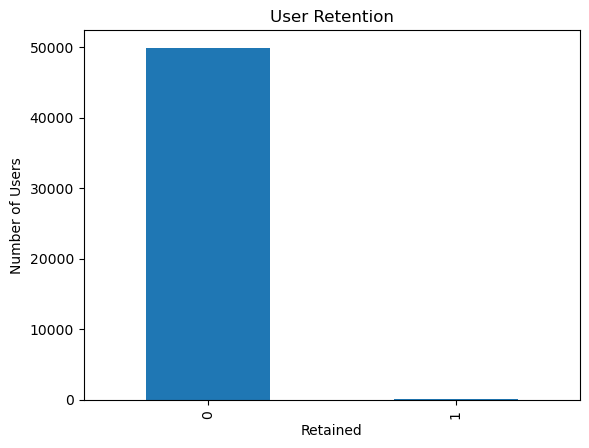

In [33]:
# Visualization of retention
df2['retained'].value_counts().plot(kind='bar', title='User Retention')
plt.xlabel('Retained')
plt.ylabel('Number of Users')
plt.show()

C:\Users\tammy\AppData\Local\Temp\ipykernel_16312\1535810790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['ultimate_black_user'] = correlation_data['ultimate_black_user'].astype(int)


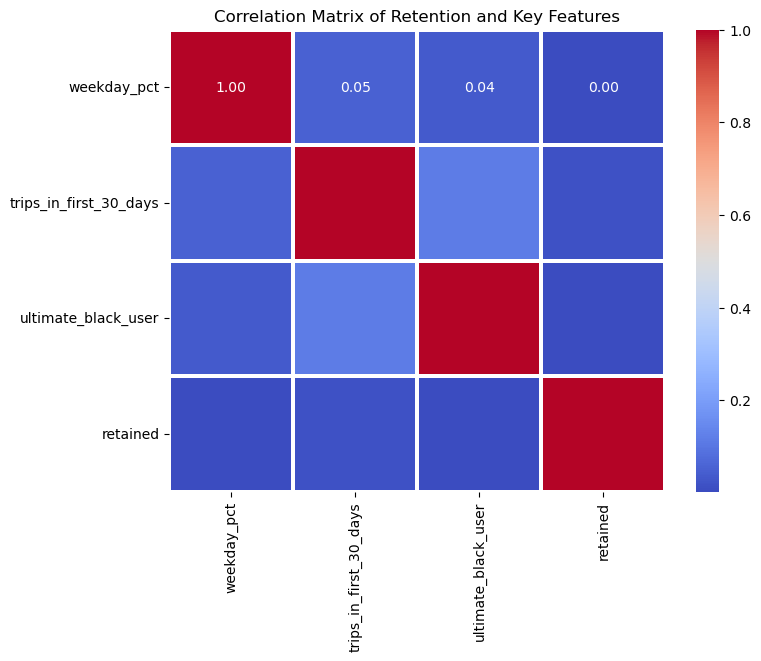

In [34]:
# Select the relevant columns for correlation analysis
correlation_data = df2[['weekday_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'retained']]

# Convert the boolean column 'ultimate_black_user' to integers (True -> 1, False -> 0)
correlation_data['ultimate_black_user'] = correlation_data['ultimate_black_user'].astype(int)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5, fmt=".2f")
plt.title('Correlation Matrix of Retention and Key Features')
plt.show()

In [35]:
#Model implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

In [36]:
# Features and target variable
X = df2[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_dist', 'surge_pct', 
        'ultimate_black_user', 'weekday_pct']]
y = df2['retained']

In [37]:
# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Train a logistic regression model
model = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, class_weight= None, random_state=10, solver='lbfgs', max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'Accuracy: {accuracy}')
print(f'ROC-AUC Score: {roc_auc}')
#Logistic regression shows overfitting due to class imbalance

Accuracy: 0.9983333333333333
ROC-AUC Score: 0.5851993322203674


In [40]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [45]:
rf_model = RandomForestClassifier(max_depth=8, max_features='log2',min_samples_leaf = 4, min_samples_split=4, n_estimators = 200)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [46]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest ROC-AUC Score: {roc_auc_rf}")

Random Forest Accuracy: 0.9983333333333333
Random Forest ROC-AUC Score: 0.7345108514190317
